## Examples of using Transformation class

Author: Dimitris Giovanis, Michael Shields

Date: 12/4/2018

In [19]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Dependence, Nataf
import numpy as np
import matplotlib.pyplot as plt

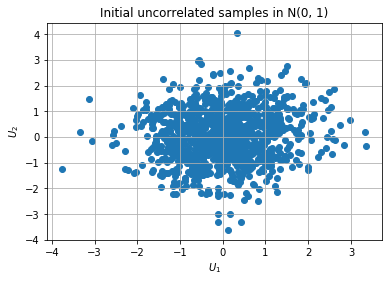

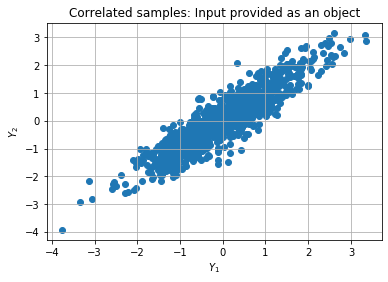

In [16]:
# Example 1: 
#In this example, the method "correlate" of the class "Dependence" is employed to correlate standard normal samples 
#generated with the UQpy MCS class. 

# Generate uncorrelated standard normal samples using MCS class
from UQpy.SampleMethods import MCS
x1 = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the initial samples
plt.figure()
plt.title('Initial uncorrelated samples in N(0, 1)')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
#Rho = np.eye(2)
y1 = Dependence(x1, corr_norm=Rho)
y1.correlate()


plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y1.samples[:, 0], y1.samples[:, 1])
plt.grid(True)
plt.title('Correlated samples: Input provided as an object')
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

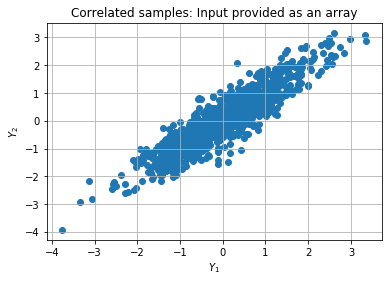

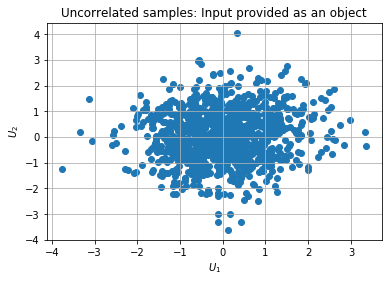

In [17]:
# Example 1 (Cont.): 
#In this example, the method 'decorrelate' is employed to decorrelate the correlated standard normal samples 
#generated in the previous example. 

# When samples are provided as an array
x1_a = x1.samples
y1a = Dependence(x1_a, corr_norm=Rho)
y1a.correlate()

plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y1a.samples[:, 0], y1a.samples[:, 1])
plt.grid(True)
plt.title('Correlated samples: Input provided as an array')
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()


z1 = Dependence(input_samples=y1)
z1.decorrelate()

# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(z1.samples[:, 0], z1.samples[:, 1])
plt.grid(True)
plt.title('Uncorrelated samples: Input provided as an object')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

Transformed Correlation matrix:
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
[[1.         0.31649732]
 [0.31649732 1.        ]]


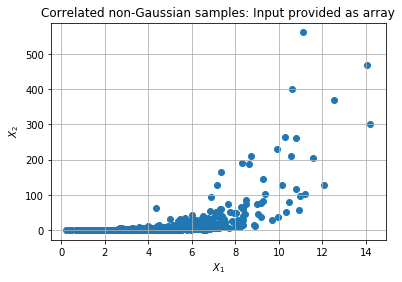

In [20]:
# Example 2: 
#a : In this example, the class 'Nataf' is employed to transform the correlated standard normal samples 
#generated in example 1 to  correlated non-Gaussian samples.

Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
#Rho = np.eye(2)
x_ng2 = Nataf(input_samples = y1.samples, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
x_ng2.inverse()
x_ng2.correlation_distortion_inv()
print(x_ng2.corr)


plt.figure()
plt.title('Correlated non-Gaussian samples: Input provided as array')
plt.scatter(x_ng2.samples[:, 0], x_ng2.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
Example 2:
#b : In this example, the class 'Nataf' is employed to transform the correlated standard normal samples 
# in the form of an object.

x_ng2b = Nataf(input_samples =y1, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])

print('Transformed Correlation matrix:')
x_ng2b.inverse()
x_ng2b.correlation_distortion_inv()
print(x_ng2b.corr)


plt.figure()
plt.title('Correlated non-Gaussian samples: Input provided as object')
plt.scatter(x_ng2b.samples[:, 0], x_ng2b.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
# Example 3:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    ww.correlation_distortion_inv()
    w4[i] = ww.corr[0, 1]

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()

In [ ]:
# Example 4:
# In this example, the class 'Nataf' is employed to transform the correlated non-Gaussian samples of example 3 
#back to standard normal samples.

x_g1 = Nataf(input_samples=x_ng1)
x_g1.transform()

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g1.samples[:, 0], x_g1.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

x_g1.correlation_distortion()
print('Correlation matrix in the standard normal space')
print(x_g1.corr_norm)

In [ ]:
# Example 5:
# Performs the Iterative Translation Approximation Method (ITAM) to estimate the underlying Gaussian 
# correlation from known values of the correlation for lognormal random variables.
# For a range of correlation values from -0.999 to 0.999, estimate the underlying Gaussian correlation 
#that most closely approximates yields the corresponding correlation for Lognormal(0,1) random variables.

w3 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 4], [2, 0.0, 4]], itam_error2=0.001)
    ww.correlation_distortion()
    w3[i] = ww.corr_norm[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

In [ ]:
# Example 8:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    ww.correlation_distortion_inv()
    w4[i] = ww.corr[0, 1]
    print(i)

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()